# Logistic Regression

Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv files into a pandas DataFrame

train_balanced = pd.read_csv('../Kaggle Data/train_balanced.csv')
train_balanced = train_balanced.set_index('enrollee_id')
train_balanced.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,target
enrollee_id,,,,,,,,,,
21102,city_16,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,<10,Pvt Ltd,0.0
8428,city_103,Male,No relevent experience,no_enrollment,Graduate,Humanities,3,50-99,Pvt Ltd,1.0
4483,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Pvt Ltd,0.0
6990,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,0.0
20599,city_21,Male,Has relevent experience,no_enrollment,Masters,STEM,8,1000-4999,Pvt Ltd,0.0


In [3]:
test_balanced = pd.read_csv('../Kaggle Data/test_balanced.csv')
test_balanced = test_balanced.set_index('enrollee_id')
test_balanced.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type
enrollee_id,,,,,,,,,
20453,city_27,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,50-99,Pvt Ltd
10663,city_114,Male,Has relevent experience,no_enrollment,Masters,STEM,11,1000-4999,Pvt Ltd
15380,city_21,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,500-999,Pvt Ltd
30759,city_74,Male,No relevent experience,no_enrollment,Graduate,Other,2,10/49,NGO
21057,city_103,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd


# Job Switching
Job switch by HR Analysis

This database was created to predict a candidate's decision to switch jobs, based upon the HR metrics collected. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by , with.

Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

## The Dataset
The following HR properties of employees included within the CSV:

enrollee_id : Unique ID for candidate

city: City code

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

target: 0 – Not looking for job change, 1 – Looking for a job change

Notes:
The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision
Please refer to the following task for more details:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015


# Preprocessing

In [4]:
# Assign X (data) and y (target)
X = train_balanced.drop(["target","city"], axis=1)
y = train_balanced["target"]


print(X.shape, y.shape)

# X_test = test_balanced.drop(["city"], axis=1)
# print(X_train.shape, y_train.shape)
# print(X_test.shape)

(1610, 8) (1610,)


In [5]:
X.loc[(X['experience'] == '>20'), 'experience'] = 21
X.loc[(X['experience'] == '<1'), 'experience'] = 0

X

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type
enrollee_id,,,,,,,,
21102,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,<10,Pvt Ltd
8428,Male,No relevent experience,no_enrollment,Graduate,Humanities,3,50-99,Pvt Ltd
4483,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Pvt Ltd
6990,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd
20599,Male,Has relevent experience,no_enrollment,Masters,STEM,8,1000-4999,Pvt Ltd
...,...,...,...,...,...,...,...,...
33060,Female,No relevent experience,Part time course,Graduate,Other,3,10/49,Funded Startup
26961,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Pvt Ltd
1281,Female,Has relevent experience,no_enrollment,Masters,STEM,6,10/49,Early Stage Startup


Encode data into binary for model

In [6]:
# Binary encoding string data with Pandas get_dummies
train_data = X.copy()

X_encoded = pd.get_dummies(train_data, columns=["gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "company_size", "company_type"])

# pd.set_option('display.max_columns', None)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 21102 to 29754
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   experience                                   1610 non-null   object
 1   gender_Female                                1610 non-null   uint8 
 2   gender_Male                                  1610 non-null   uint8 
 3   relevent_experience_Has relevent experience  1610 non-null   uint8 
 4   relevent_experience_No relevent experience   1610 non-null   uint8 
 5   enrolled_university_Full time course         1610 non-null   uint8 
 6   enrolled_university_Part time course         1610 non-null   uint8 
 7   enrolled_university_no_enrollment            1610 non-null   uint8 
 8   education_level_Graduate                     1610 non-null   uint8 
 9   education_level_Masters                      1610 non-null   uint8 
 10  educati

In [7]:
X_encoded

,experience,gender_Female,gender_Male,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_Masters,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
enrollee_id,,,,,,,,,,,,,,,,,,,,,
21102,3,0,1,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
8428,3,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4483,14,0,1,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
6990,8,0,1,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
20599,8,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33060,3,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
26961,6,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1281,6,1,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


Split our data into training and testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1)

# Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
# # Scale & Normalization of data with StandardScaler
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train_encoded)
# y_scaler = StandardScaler().fit(y_train)

In [11]:
# # Transform data with scaler
# X_train_scaled = X_scaler.transform(X_train_encoded)
# X_test_scaled = X_scaler.transform(X_test_encoded)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

Fit (train) or model using the training data

In [12]:
# classifier.fit(X_train_scaled, y_train_scaled)

## OR the non-scaled data?
classifier.fit(X_train, y_train)




LogisticRegression()

Validate the model using the test data

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

## OR score using scaled data
# print(f"Training Data Score: {classifier.score(X_train_scaled, y_train_scaled)}")
# print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

# fIX ERROR: NEED TO CRUD AND MERGE submission.csv DATA WITH test_balanced.csv DATA TO GET THE Y_TEST ["target"] column!!

Training Data Score: 0.8251864125932062
Testing Data Score: 0.8486352357320099


Make predictions

In [14]:
LR_predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {LR_predictions[:10]}")
print(f"First 10 Actual targets: {y_test[:10].tolist()}")

First 10 Predictions:   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 Actual targets: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [15]:
LR_results = pd.DataFrame({"Prediction": LR_predictions, "Actual": y_test}).reset_index(drop=True)
LR_results

,Prediction,Actual
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
398,0.0,0.0
399,0.0,0.0
400,0.0,0.0
401,0.0,0.0


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.9362054681027341
Testing Data Score: 0.7990074441687345


In [17]:
RF_predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {RF_predictions[:50]}")
print(f"First 10 Actual targets: {y_test[:50].tolist()}")

First 10 Predictions:   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
First 10 Actual targets: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]


In [18]:
RF_results = pd.DataFrame({"Prediction": RF_predictions, "Actual": y_test}).reset_index(drop=True)
RF_results

,Prediction,Actual
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
398,0.0,0.0
399,0.0,0.0
400,0.0,0.0
401,0.0,0.0


In [19]:
feature_names = X_train.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4363118976406339, 'experience'),
 (0.03351791634509168, 'company_type_Pvt Ltd'),
 (0.029994586246833935, 'company_size_50-99'),
 (0.029017958194200145, 'company_size_100-500'),
 (0.027775738554786294, 'education_level_Masters'),
 (0.027290357305310764, 'gender_Female'),
 (0.026764013364137123, 'gender_Male'),
 (0.02644448364580308, 'education_level_Graduate'),
 (0.02392326120254052, 'company_size_10/49'),
 (0.023230265301384116, 'company_size_10000+'),
 (0.022057518361388116, 'enrolled_university_no_enrollment'),
 (0.021417831862841446, 'company_size_500-999'),
 (0.020869100112648985, 'company_type_Funded Startup'),
 (0.020710689775583206, 'enrolled_university_Full time course'),
 (0.02028750681297809, 'relevent_experience_Has relevent experience'),
 (0.020257287831375478, 'relevent_experience_No relevent experience'),
 (0.01960947398365073, 'company_size_<10'),
 (0.018883090919498725, 'company_size_1000-4999'),
 (0.01847038100013976, 'major_discipline_STEM'),
 (0.01790716861246390

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [21]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 1.57670829,  1.00082884, -1.00082884, ..., -0.09590268,
        -0.28555423,  0.64549722],
       [ 0.06102901, -0.99917184,  0.99917184, ..., -0.09590268,
        -0.28555423,  0.64549722],
       [-0.69681063, -0.99917184,  0.99917184, ..., -0.09590268,
        -0.28555423,  0.64549722],
       ...,
       [-0.99994649,  1.00082884, -1.00082884, ..., -0.09590268,
        -0.28555423,  0.64549722],
       [-0.24210685, -0.99917184,  0.99917184, ..., -0.09590268,
        -0.28555423, -1.54919334],
       [-0.84837856,  1.00082884, -1.00082884, ..., -0.09590268,
         3.50196177, -1.54919334]])

Finding optimal K value

k: 1, Train/Test Score: 0.929/0.725
k: 3, Train/Test Score: 0.866/0.816
k: 5, Train/Test Score: 0.840/0.821
k: 7, Train/Test Score: 0.838/0.846
k: 9, Train/Test Score: 0.831/0.849
k: 11, Train/Test Score: 0.830/0.841
k: 13, Train/Test Score: 0.825/0.841
k: 15, Train/Test Score: 0.826/0.846
k: 17, Train/Test Score: 0.824/0.849
k: 19, Train/Test Score: 0.823/0.849


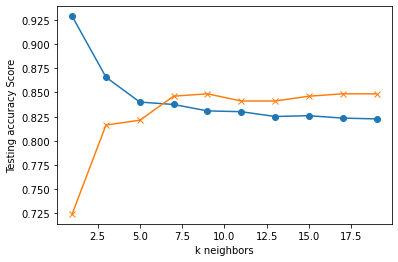

In [23]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Note that k: XXX seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.841


In [25]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.8260149130074566
Testing Data Score: 0.8486352357320099


In [26]:
KNN_predictions = knn.predict(X_test)
print(f"First 10 Predictions:   {KNN_predictions[:10]}")
print(f"First 10 Actual targets: {y_test[:10].tolist()}")

First 10 Predictions:   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 Actual targets: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [27]:
KNN_results = pd.DataFrame({"Prediction": KNN_predictions, "Actual": y_test}).reset_index(drop=True)
KNN_results

,Prediction,Actual
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
398,0.0,0.0
399,0.0,0.0
400,0.0,0.0
401,0.0,0.0


In [28]:
from sklearn.model_selection import cross_val_score
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE

def evaluate_model(model, X, y):
    
#     classifier = Pipeline([
#         ('passthrough', SMOTE()),
#         ('model', model)
#     ])
    
    model.fit(X, y)
    
    auc = cross_val_score(model, X, y, cv=None, scoring='roc_auc')
    print("AUC score of " + model.__class__.__name__ + " = " + str(auc.mean()))
    
    return classifier

In [29]:
classifier_LR = evaluate_model(LogisticRegression(), X_train, y_train)
classifier_RF = evaluate_model(RandomForestClassifier(), X_train, y_train)
classifier_KNN = evaluate_model(KNeighborsClassifier(), X_train, y_train)

AUC score of LogisticRegression = 0.6230279373055755
AUC score of RandomForestClassifier = 0.5377381550610194
AUC score of KNeighborsClassifier = 0.5627729121799473


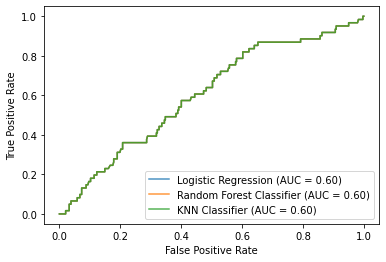

In [30]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
plot_roc_curve(classifier_LR, X_test, y_test, ax=ax, alpha=0.8, name="Logistic Regression")
plot_roc_curve(classifier_RF, X_test, y_test, ax=ax, alpha=0.8, name="Random Forest Classifier")
plot_roc_curve(classifier_KNN, X_test, y_test, ax=ax, alpha=0.8, name="KNN Classifier")
plt.show()